# Introduction

In [2]:
# https://www.kaggle.com/datasets/prashant111/discover-the-menu/data

In [3]:
# install necessary libraries

# for detecting text encoding
! pip install chardet -q 
# for detecting language
! pip install langid -q 

! pip install pillow -q 

! pip install wordcloud -q

! pip install iso-639 -q

! pip install gensim -q



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\sadak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\sadak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\sadak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\sadak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\User

In [4]:
import pandas as pd
import numpy as np
import chardet
import langid
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Checkpoint 1

In [5]:
SEED = 6

In [6]:
# know the encoding of a file

with open('dish.csv', 'rb') as f:
    data = f.read()
    encoding_result = chardet.detect(data)
    print(encoding_result)

encoding = encoding_result['encoding']

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [7]:
df = pd.read_csv('dish.csv', encoding=encoding)
df.head()


,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,1,Consomme printaniere royal,NaN,8,8,1897,1927,0.20,0.4
1,2,Chicken gumbo,NaN,111,117,1895,1960,0.10,0.8
2,3,Tomato aux croutons,NaN,14,14,1893,1917,0.25,0.4
3,4,Onion au gratin,NaN,41,41,1900,1971,0.25,1.0
4,5,St. Emilion,NaN,66,68,1881,1981,0.00,18.0


In [8]:
df['description'].value_counts()

Series([], Name: description, dtype: int64)

It came to know description feature has null values

for time being only name is considering for clustering 

In [9]:
df['name'].value_counts()

Coffee                               4
Apollinaris                          4
Apfelsaft                            4
Tongue                               4
Fruit                                4
                                    ..
Grog von Bordeaux, Eisbrecher        1
Grog von Arrak, Sternanis            1
Tasse Schokolade mit Sahne           1
Perrier Jouet "Grand Vin Brut"       1
Comandante Cap. Sup. Mario Crepaz    1
Name: name, Length: 422922, dtype: int64

In [10]:
df['name'].isna().sum()

0

In [11]:
names = df[['name']]
grouped_df = names.groupby('name').agg({'name': 'count'})

In [12]:
print(f"Dish name before and after grouping is {names.shape[0]}, {grouped_df.shape[0]}")

Dish name before and after grouping is 426740, 422922


In [13]:

grouped_df.columns=[ 'count']
grouped_df.reset_index(inplace=True)

In [14]:
# Language detection in item names
grouped_df['language'] = grouped_df['name'].apply(langid.classify) 
grouped_df.head()

,name,count,language
0,""" hashed in cream",1,"(en, -21.231042861938477)"
1,""" Newburg",1,"(en, 9.061840057373047)"
2,""" "" kidneys",1,"(et, 0.27718591690063477)"
3,""" poached",1,"(en, 9.061840057373047)"
4,""" cocotte",1,"(en, 9.061840057373047)"


In [15]:
grouped_df['language_code'] = grouped_df['language'].apply(lambda x: x[0])
grouped_df['language_confidence_score'] = grouped_df['language'].apply(lambda x: x[1])

In [16]:
grouped_df.head()

,name,count,language,language_code,language_confidence_score
0,""" hashed in cream",1,"(en, -21.231042861938477)",en,-21.231043
1,""" Newburg",1,"(en, 9.061840057373047)",en,9.061840
2,""" "" kidneys",1,"(et, 0.27718591690063477)",et,0.277186
3,""" poached",1,"(en, 9.061840057373047)",en,9.061840
4,""" cocotte",1,"(en, 9.061840057373047)",en,9.061840


In [17]:
# text = ''
# for i in grouped_df['name'].values:
#     text += i + ' '

In [18]:
grouped_df.to_csv('dish_with_lang.csv', index=False)

# Checkpoint 2

In [19]:
grouped_df = pd.read_csv('dish_with_lang.csv')

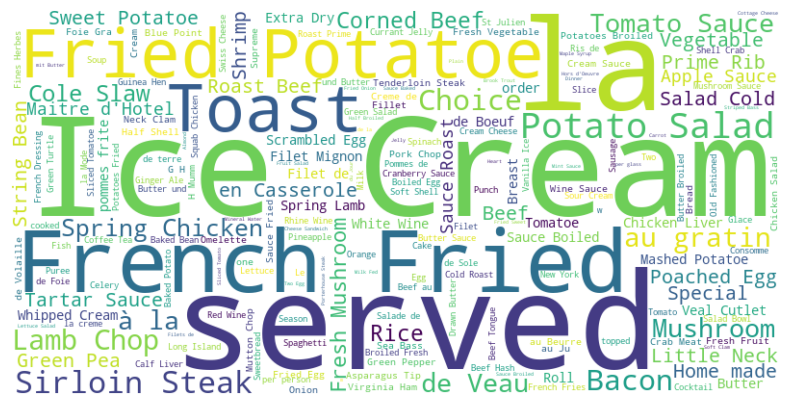

In [20]:
text_data = ' '.join(map(str, grouped_df['name'].values))

#'text_data' contains your text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [21]:
from PIL import Image

# Load an image as the mask
# mask_image = np.array(Image.open('wordcloud.png'))

# Create a masked word cloud
wordcloud = WordCloud(background_color='white').generate(text_data)

wordcloud.to_file('wordcloud.png')


## Preprocessing

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from iso639 import languages



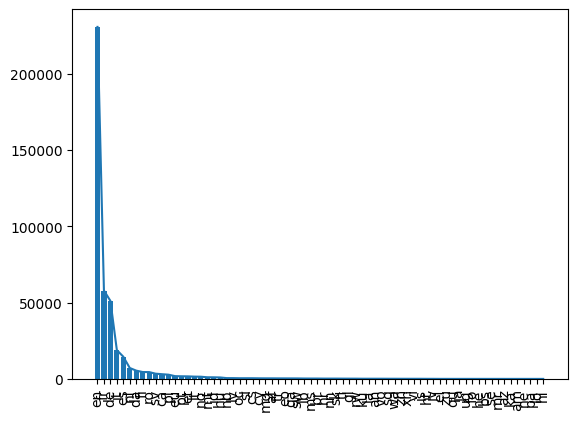

In [23]:
grouped_df['language_code'].value_counts()

plt.plot(grouped_df['language_code'].value_counts())
plt.bar(grouped_df['language_code'].value_counts().index, grouped_df['language_code'].value_counts())
plt.xticks(rotation=90)

plt.show()

In [24]:

df = pd.DataFrame(grouped_df['language_code'].value_counts().sort_values(ascending=False))
df.rename_axis('language_code', inplace=True)
df.columns=['count']
df.reset_index(inplace=True)
df['cumperc'] = df['count'].cumsum() / df['count'].sum() * 100
df.head()


,language_code,count,cumperc
0,en,230710,54.551430
1,fr,57933,68.249701
2,de,51136,80.340819
3,it,18874,84.803581
4,es,14539,88.241331


In [25]:
print(f"99 %tile values are falls in {len(df[df['cumperc']<99.1])} languages, \n97 %tile values are falls in {len(df[df['cumperc']<97])} languages, \n95 %tile values are falls in {len(df[df['cumperc']<95])} languages.")

99 %tile values are falls in 29 languages, 
97 %tile values are falls in 15 languages, 
95 %tile values are falls in 11 languages.


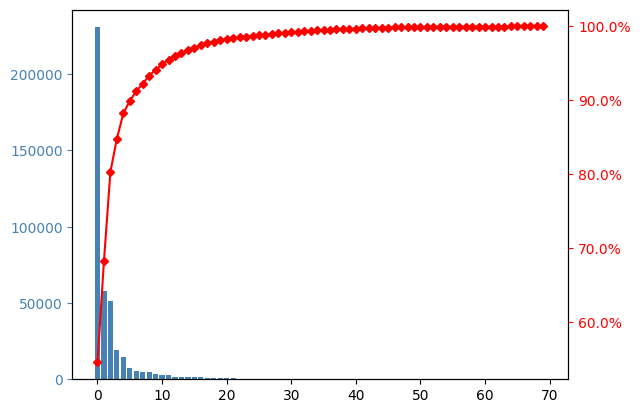

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Define aesthetics for the plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

# Create the basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['count'], color=color1)

# Add the cumulative percentage line
ax2 = ax.twinx()
ax2.plot(df.index, df['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# Display the Pareto chart
plt.show()


considering 97 percentile languages are considering for clustering and feature engineering

In [27]:
df[df['cumperc']<97]

,language_code,count,cumperc
0,en,230710,54.551430
1,fr,57933,68.249701
2,de,51136,80.340819
3,it,18874,84.803581
4,es,14539,88.241331
5,nl,7149,89.931713
6,da,5423,91.213983
7,fi,4497,92.277299
8,ro,4464,93.332813
9,sv,3423,94.142182


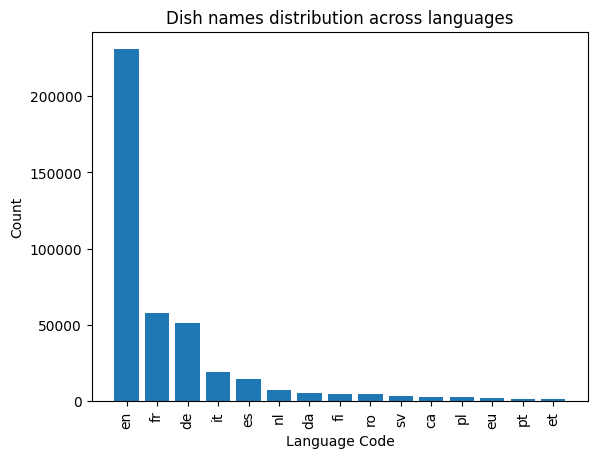

In [28]:
df = df[df['cumperc']<97]
plt.bar(df['language_code'], df['count'])
plt.title('Dish names distribution across languages')
plt.xticks(rotation=90)
plt.xlabel('Language Code')
plt.ylabel('Count')

plt.show()

In [29]:
df['language'] = df['language_code'].apply(lambda x: languages.get(alpha2=x).name)

In [30]:
df

,language_code,count,cumperc,language
0,en,230710,54.551430,English
1,fr,57933,68.249701,French
2,de,51136,80.340819,German
3,it,18874,84.803581,Italian
4,es,14539,88.241331,Spanish
5,nl,7149,89.931713,Dutch
6,da,5423,91.213983,Danish
7,fi,4497,92.277299,Finnish
8,ro,4464,93.332813,Romanian
9,sv,3423,94.142182,Swedish


In [31]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [32]:
# stop word removal
for language in df['language']:
    try:
        print(stopwords.words(language))
    except Exception as e:
        print(e)
        print(language)
        continue



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In NLTK we don't have stopwords for Polih and Estonian, Ignoring the following items in a data

In [33]:
df = df[~df['language'].isin(['Polish', 'Estonian'])]

In [34]:
# add language column in grouped df and then filter with our language selection
grouped_df['language'] = grouped_df['language_code'].apply(lambda x: languages.get(alpha2=x).name)
filtered_dishes = grouped_df[grouped_df['language'].isin(df['language'].values)]
filtered_dishes.head()


,name,count,language,language_code,language_confidence_score
0,""" hashed in cream",1,English,en,-21.231043
1,""" Newburg",1,English,en,9.061840
3,""" poached",1,English,en,9.061840
4,""" cocotte",1,English,en,9.061840
5,""" "" au gratin",1,French,fr,-18.370433


In [35]:
dishes_by_lang = filtered_dishes.groupby('language')

dishes_by_lang.get_group('French')

,name,count,language,language_code,language_confidence_score
5,""" "" au gratin",1,French,fr,-18.370433
10,""" a la Bordelaise",1,French,fr,-55.226426
17,""" au beurre noir",1,French,fr,-40.858494
29,""" "" a la Bearnaise",1,French,fr,-55.596616
30,""" "" a la Bordelaise",1,French,fr,-55.226426
...,...,...,...,...,...
422823,Œufs à la tripe,1,French,fr,-74.952251
422824,"Œufs, Mayonnaise",1,French,fr,-39.374303
422828,œufs Brouillés aux Truffes du Quercy,1,French,fr,-149.334074
422830,œufs Plat Miroir,1,French,fr,-30.151288


remove stop words and special characters

stemming then lematization

create a corpus

keyword extraction using corpus

plot the distribution by count and fix the threshold

In [36]:
filtered_dishes['language'].unique()

array(['English', 'French', 'Dutch', 'Italian', 'Catalan', 'Spanish',
       'Finnish', 'German', 'Danish', 'Romanian', 'Portuguese', 'Swedish',
       'Basque'], dtype=object)

In [37]:
# special characters and symbols removal
import re
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    return text.strip()


In [38]:
def stemmer(text):
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split()]
    return text
    

In [39]:
# remove stop words
from nltk.corpus import stopwords
def remove_stop_words(text):
    stop_words = stopwords.words('english')
    text = [word.lower() for word in text if word not in stop_words]
    return text

In [40]:

def words_to_sentence(words_array):
    # Join the words using a space and return the sentence
    return ' '.join(words_array)




In [41]:
english_dishes = dishes_by_lang.get_group('English')
english_dishes['no special characters'] = english_dishes['name'].apply(remove_special_characters)

C:\Users\sadak\AppData\Local\Temp\ipykernel_23400\988508054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dishes['no special characters'] = english_dishes['name'].apply(remove_special_characters)


In [42]:
english_dishes['stemmed text'] = english_dishes['no special characters'].apply(stemmer)

C:\Users\sadak\AppData\Local\Temp\ipykernel_23400\3957423377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dishes['stemmed text'] = english_dishes['no special characters'].apply(stemmer)


In [43]:
english_dishes['stop word removed text'] = english_dishes['stemmed text'].apply(remove_stop_words)

C:\Users\sadak\AppData\Local\Temp\ipykernel_23400\3805276042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dishes['stop word removed text'] = english_dishes['stemmed text'].apply(remove_stop_words)


In [44]:
english_dishes['corpus'] = english_dishes['stop word removed text'].apply(words_to_sentence)

C:\Users\sadak\AppData\Local\Temp\ipykernel_23400\1159493778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_dishes['corpus'] = english_dishes['stop word removed text'].apply(words_to_sentence)


In [45]:
english_dishes.head()

,name,count,language,language_code,language_confidence_score,no special characters,stemmed text,stop word removed text,corpus
0,""" hashed in cream",1,English,en,-21.231043,hashed in cream,"[hash, in, cream]","[hash, cream]",hash cream
1,""" Newburg",1,English,en,9.061840,Newburg,[newburg],[newburg],newburg
3,""" poached",1,English,en,9.061840,poached,[poach],[poach],poach
4,""" cocotte",1,English,en,9.061840,cocotte,[cocott],[cocott],cocott
7,""" "" mushrooms",1,English,en,9.061840,mushrooms,[mushroom],[mushroom],mushroom


In [49]:
import pdb
from collections import Counter

# Define a function to calculate the frequency of words in the corpus
def calculate_word_frequency(corpus):
    # Initialize an empty Counter object to store word frequencies
    word_freq = Counter()
    
    # Iterate over each document in the corpus
    for document in corpus:

        # Split the document into words and update the Counter object
        word_freq.update(document.lower().split())
    
    # Convert the Counter object to a dictionary
    word_freq_dict = dict(word_freq)
    
    return word_freq_dict

# Calculate the word frequency using the 'text' column of the DataFrame
word_frequency = calculate_word_frequency(english_dishes['corpus'])

# Print the word frequency dictionary
print("Word Frequency Dictionary:")
print(word_frequency)


Word Frequency Dictionary:
{'hash': 1715, 'cream': 14414, 'newburg': 485, 'poach': 1872, 'cocott': 128, 'mushroom': 5885, 'truffl': 559, 'chees': 7102, 'tomato': 8301, 'fri': 13983, 'shir': 502, 'celestin': 127, 'extra': 2774, 'sauc': 16801, 'meat': 2799, 'ball': 465, 'chicken': 14497, 'mush': 161, 'room': 97, 'bambooshoot': 4, 'waterchest': 1, 'bread': 5399, 'scrambl': 1535, 'spanish': 811, 'style': 3245, 'la': 5073, 'meyerb': 41, 'clam': 3288, 'jelli': 3347, 'sandwich': 4152, 'slice': 4704, 'turkey': 2790, 'home': 1128, 'made': 1420, 'european': 27, 'type': 81, 'dark': 339, 'lettuc': 3259, 'organ': 47, 'grown': 44, 'trapp': 18, 'garden': 567, 'serv': 5656, 'open': 287, 'tavel': 39, 'rose': 438, 'chateau': 685, 'aqueria': 4, 'brilliant': 11, 'color': 56, 'clean': 21, 'crisp': 966, 'franc': 188, 'beef': 10859, 'taco': 135, 'bean': 3549, 'rice': 4936, 'b': 575, 'enchilada': 121, 'f': 217, 'chili': 382, 'relleno': 45, 'g': 811, 'burrito': 62, 'leg': 1595, 'lamb': 5695, 'caper': 395, 'egg

In [50]:
english_dishes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230710 entries, 0 to 422857
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   name                       230710 non-null  object 
 1   count                      230710 non-null  int64  
 2   language                   230710 non-null  object 
 3   language_code              230710 non-null  object 
 4   language_confidence_score  230710 non-null  float64
 5   no special characters      230710 non-null  object 
 6   stemmed text               230710 non-null  object 
 7   stop word removed text     230710 non-null  object 
 8   corpus                     230710 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 17.6+ MB


In [46]:
english_dishes.to_csv('english_dishes.csv', index=False)